In [50]:
print(__doc__)

Automatically created module for IPython interactive environment


In [51]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [53]:
from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

In [54]:
iris = datasets.load_iris()

In [59]:
data = iris.data
labels = iris.target

In [60]:
print("data.shape:{}".format(data.shape))
print("labels.shape:{}".format(labels.shape))

data.shape:(150, 4)
labels.shape:(150,)


In [61]:
data = data[labels!=2]
print("data.shape:{}".format(data.shape))

data.shape:(100, 4)


In [63]:
labels = labels[labels!=2]
print("labels.shape:{}".format(labels.shape))

labels.shape:(100,)


In [64]:
data /= data.max()

In [65]:
cs = l1_min_c(data,labels,loss="log")*np.logspace(0,7,16)

In [68]:
print("computing regularization path...")

computing regularization path...


In [69]:
start = time()

In [70]:
clf = linear_model.LogisticRegression(penalty="l1",solver="saga",
                                     tol=1e-6,max_iter=int(1e6),
                                     warm_start=True)

In [72]:
coefs_ = list()

In [73]:
for c in cs:
    clf.set_params(C=c)
    clf.fit(data,labels)
    coefs_.append(clf.coef_.ravel().copy())

In [76]:
print("this took %0.3fs"%(time()-start))

this took 226.977s


In [77]:
coefs_ = np.array(coefs_)

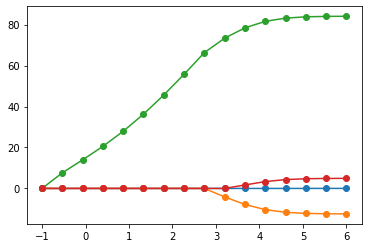

In [78]:
plt.plot(np.log10(cs),coefs_,marker="o")

In [79]:
cs.shape

(16,)

In [80]:
coefs_.shape

(16, 4)

In [83]:
data.shape

(100, 4)

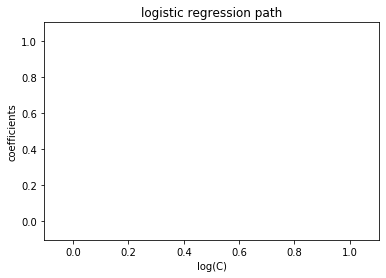

In [85]:
ymin,ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("coefficients")
plt.title("logistic regression path")
plt.axis("tight")
plt.show()